In [ ]:
# Neural Networks

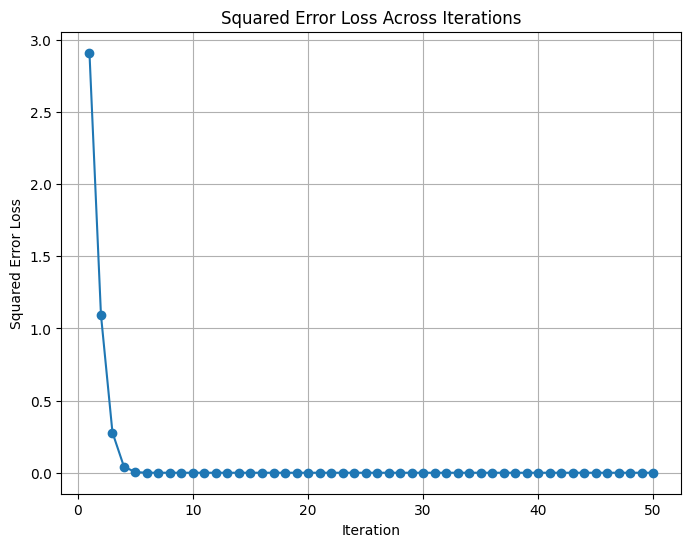

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Define activation function (ReLU)
def relu(x):
    return np.maximum(0, x)

# Derivative of ReLU
def relu_derivative(x):
    return np.where(x > 0, 1, 0)

# Forward propagation
def forward_propagation(x, weights):
    z1 = weights[0] @ x
    a1 = relu(z1)
    z2 = weights[1] @ a1
    y_hat = z2[0]
    return {"x": x, "z1": z1, "a1": a1, "z2": z2, "y_hat": y_hat}

# Backward propagation
def backward_propagation(forward_cache, y, weights):
    x, z1, a1, z2, y_hat = forward_cache["x"], forward_cache["z1"], forward_cache["a1"], forward_cache["z2"], forward_cache["y_hat"]
    dz2 = np.array([y_hat - y])
    dw2 = dz2[:, None] @ a1[None, :]
    da1 = weights[1].T @ dz2
    dz1 = da1 * relu_derivative(z1)
    dw1 = dz1[:, None] @ x[None, :]
    return [dw1, dw2]

# Update weights
def update_weights(weights, gradients, learning_rate):
    return [w - learning_rate * dw for w, dw in zip(weights, gradients)]

# Training the neural network
def train_neural_network(x, y, learning_rate, iterations):
    np.random.seed(42)
    weights = [
        np.random.uniform(0, 1, (2, 2)),  # Weights for layer 1
        np.random.uniform(0, 1, (1, 2))   # Weights for layer 2
    ]
    loss_history = []

    for i in range(iterations):
        # Forward pass
        forward_cache = forward_propagation(x, weights)

        # Compute loss (squared error)
        y_hat = forward_cache["y_hat"]
        loss = 0.5 * (y_hat - y) ** 2
        loss_history.append(loss)

        # Backward pass
        gradients = backward_propagation(forward_cache, y, weights)

        # Update weights
        weights = update_weights(weights, gradients, learning_rate)

    return weights, loss_history

# Initialize parameters
x = np.array([2, 1])  # Input sample
y = 3                 # True output
learning_rate = 0.05  # Learning rate
iterations = 50       # Number of iterations

# Train the network
_, loss_history = train_neural_network(x, y, learning_rate, iterations)

# Plot the squared error loss
plt.figure(figsize=(8, 6))
plt.plot(range(1, iterations + 1), loss_history, marker='o')
plt.title('Squared Error Loss Across Iterations')
plt.xlabel('Iteration')
plt.ylabel('Squared Error Loss')
plt.grid(True)
plt.show()



This is the plot of the squared error loss as a function of the number of iterations. The code successfully implements backpropagation to train the neural network and tracks the loss over 50 iterations.

Also, the final loss after 50 iterations is :-  

Loss = 9.86 x 10^-32

This value is effectively negligible and very close to zero, showing that the neural network has fit the given data perfectly.